In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# reverse the dictionary
states = {v: k for k, v in states.items()}

In [85]:
coli_json = pd.read_json('coli.json')
qa_df = pd.read_csv('qa.txt', sep="\t")
states_df = pd.read_excel('states2022.xlsx')


In [73]:
qa_df["STATE"] = qa_df["LOCATION"].apply(lambda x: x.split(",")[-1].strip())
qa_df["STATE"] = qa_df["STATE"].replace("VI", "VA")
qa_df["BASE SALARY"] = qa_df["BASE SALARY"].apply(lambda x: x.replace("$", "").replace(",", "")).astype(float)

# remove 801000.000000
qa_df = qa_df[qa_df["BASE SALARY"] < 800000]

qa_df.head(5)

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,STATE
0,GLOBAL FORCE USA INC,QA AUTOMATION TEST ENGINEER,100000.0,"SAN ANTONIO, TX",06/16/2023,10/01/2023,TX
1,GLOBEX IT SOLUTIONS INC,QA GUIDEWIRE ENGINEER,99549.0,"SOUTH PLAINFIELD, NJ",08/09/2023,08/17/2023,NJ
2,PROJECT MANAGEMENT INSTITUTE INC,QA & AUTOMATION ARCHITECT,168000.0,"WEST CHESTER, PA",04/19/2023,10/16/2023,PA
3,PROJECT MANAGEMENT INSTITUTE INC,QA & AUTOMATION ENGINEER III,156818.0,"WEST CHESTER, PA",09/08/2023,02/08/2024,PA
4,SATURN INFOSYSTEMS LLC,QA & TEST ENGINEER,90000.0,"CARY, NC",05/25/2023,10/02/2023,NC


In [74]:
coli_json["state"] = coli_json["state"].map(states)
coli_json["coli_ratio"] = 100 / coli_json["CostOfLivingIndex2023"]
coli_scale = {}
for index, row in coli_json.iterrows():
    coli_scale[row["state"]] = row["coli_ratio"]
coli_json.head(5)

,state,CostOfLivingIndex2023,CostOfLivingIndexGroceryCostsIndex,CostOfLivingIndexHealthCostsIndex,CostOfLivingIndexHousingCostsIndex,CostOfLivingIndexMiscCostsIndex,CostOfLivingIndexTransportationCostsIndex,CostOfLivingIndexUtilityCostsIndex,coli_ratio
0,AL,88.8,96.4,86.9,70.4,96.2,92.0,103.6,1.126126
1,AK,124.4,127.4,149.8,118.1,118.8,121.9,148.1,0.803859
2,AZ,107.2,101.8,93.5,125.3,102.1,99.2,94.3,0.932836
3,AR,90.3,95.4,87.2,76.3,99.1,92.2,91.8,1.107420
4,CA,134.5,112.3,106.4,186.5,110.9,124.1,124.8,0.743494


(array([ 25000.,  50000.,  75000., 100000., 125000., 150000., 175000.,
        200000., 225000., 250000.]),
 [Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000'),
  Text(225000.0, 0, '225000'),
  Text(250000.0, 0, '250000')])

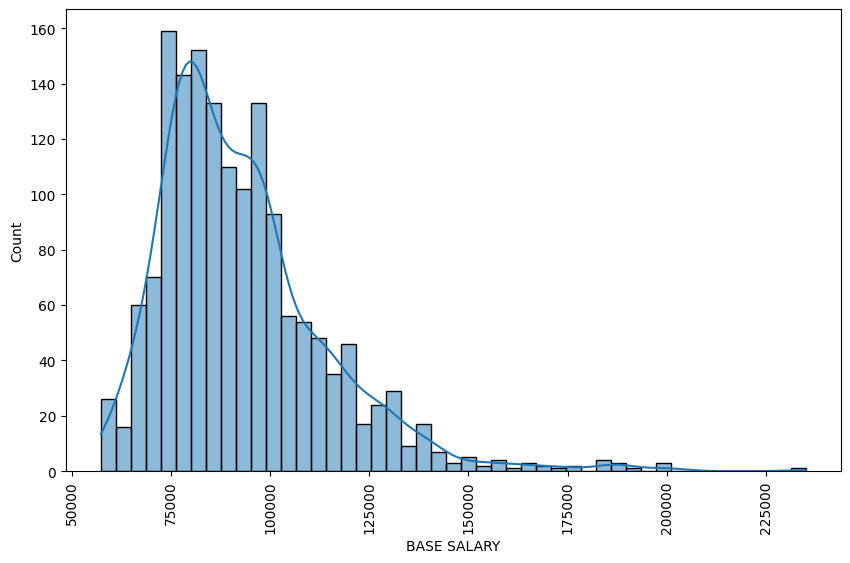

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(qa_df["BASE SALARY"], kde=True)
plt.xticks(rotation=90)

In [76]:
qa_df_scaled = qa_df.copy()
for index, row in qa_df.iterrows():
    try:
        qa_df_scaled.at[index, "BASE SALARY"] = row["BASE SALARY"] * coli_scale[row["STATE"]]
    except:
        print(index)
        print(row["STATE"])
        print(row["BASE SALARY"])
        print(coli_scale[row["STATE"]])

<Axes: xlabel='BASE SALARY', ylabel='Count'>

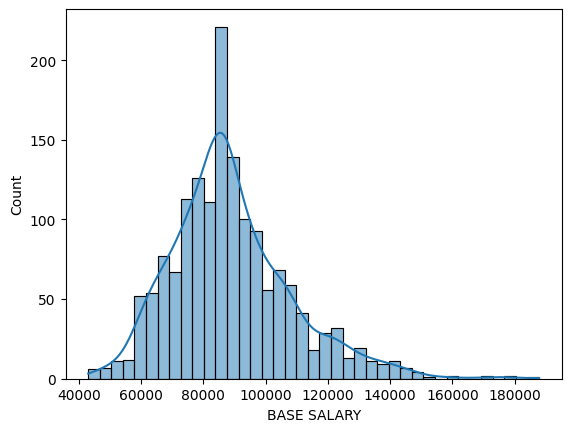

In [77]:
sns.histplot(qa_df_scaled["BASE SALARY"], kde=True)

<Axes: xlabel='STATE'>

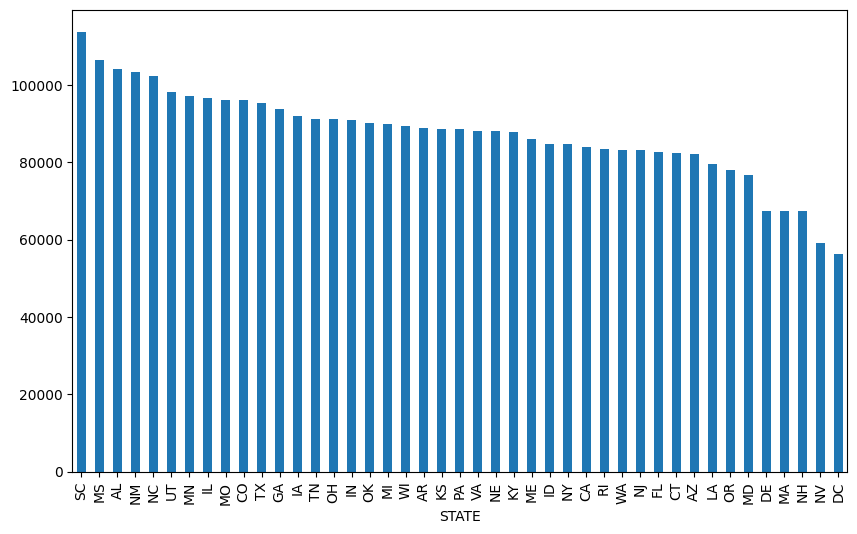

In [81]:
qa_df_scaled.groupby("STATE")["BASE SALARY"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))

<Axes: xlabel='state'>

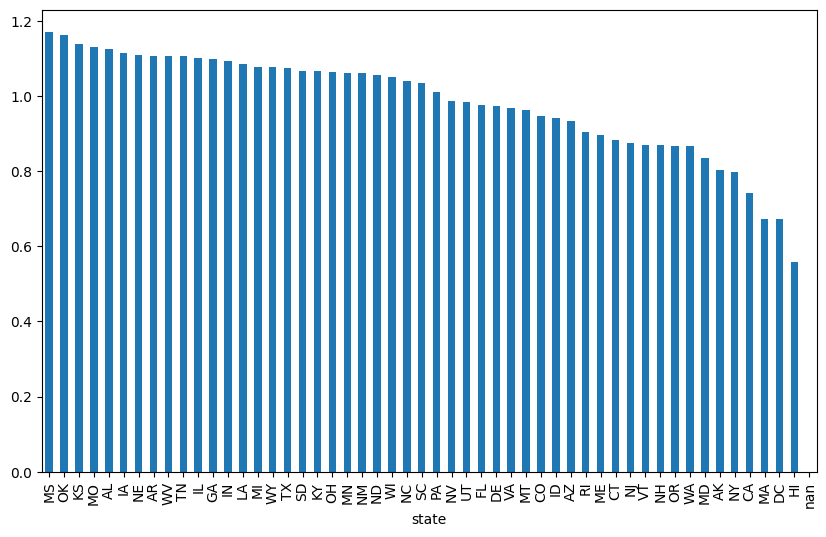

In [82]:
# plot coli_scale
coli_json.set_index("state")["coli_ratio"].sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))

<Axes: xlabel='state'>

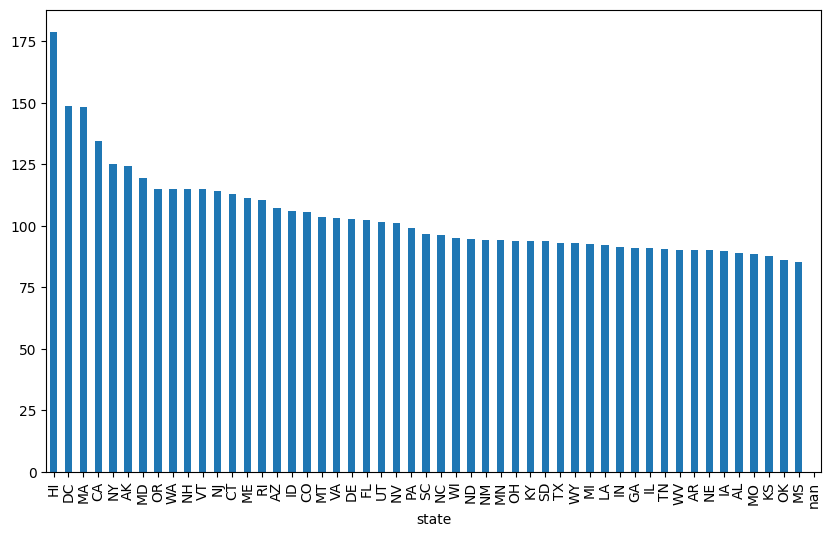

In [83]:
# plot cost of living index
coli_json.set_index("state")["CostOfLivingIndex2023"].sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))